# Dataframe Trip 

In [86]:


%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [135]:
# carga del Dataframe Trip
trip = pd.read_csv('Data/trip.csv', low_memory=False)
weather=pd.read_csv('Data/weather.csv', low_memory=False)
station=pd.read_csv('Data/station.csv', low_memory=False)
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [82]:
trip.head(5)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [163]:
import calendar
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['start_year'] = trip['start_date'].map(lambda x:x.year)
trip['start_hour'] = pd.to_datetime(trip['start_date'], format = '%H', errors = 'coerce').dt.hour

trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_year,start_hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013,12


Se puede observar en primera instancia que hay algunos viajes que solo duran 1 o dos minutos, que comienzan y terminan en la misma estacion, habria que ver el motivo por el cual el alquiler de bicicleta dura tan poco. ej: comienza a llover.

In [136]:
#Limpieza de valores que no aportan
trip.dropna( )
trip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [ ]:
#Como varian los viajes con la hora en el día?

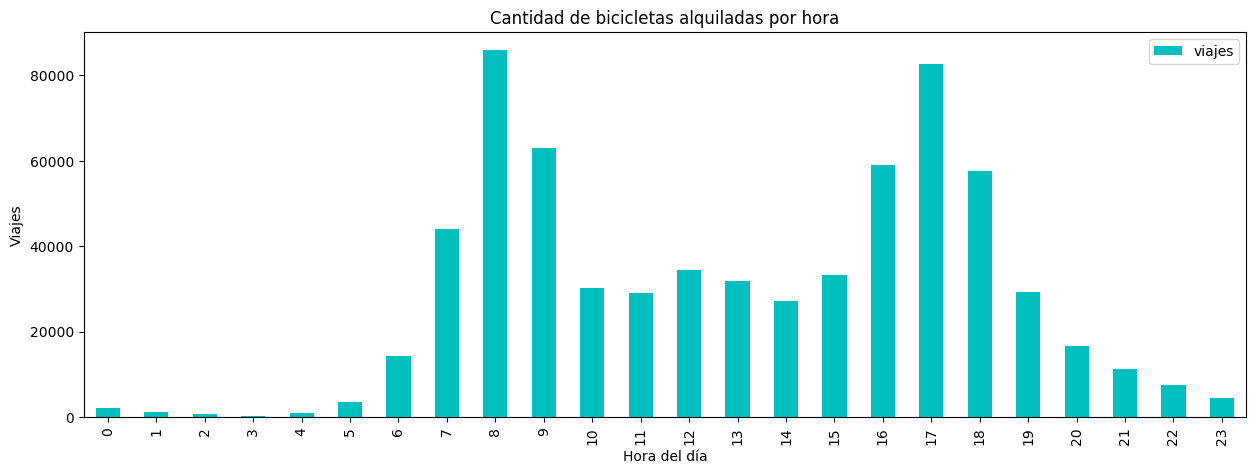

In [190]:
viajes= trip.loc[:,('start_hour', 'viajes')].groupby('start_hour').agg(np.size)
viajes.plot.bar(color='c')
plt.xlabel('Hora del día')
plt.ylabel("Viajes")
plt.title("Cantidad de bicicletas alquiladas por hora")


Cuales son los viajes mas frecuentes ? Saber esto podria abastecer las estaciones con mas bicicletas que otras estaciones que no son tan concurridas y distribuirlas de manera mas productivas.

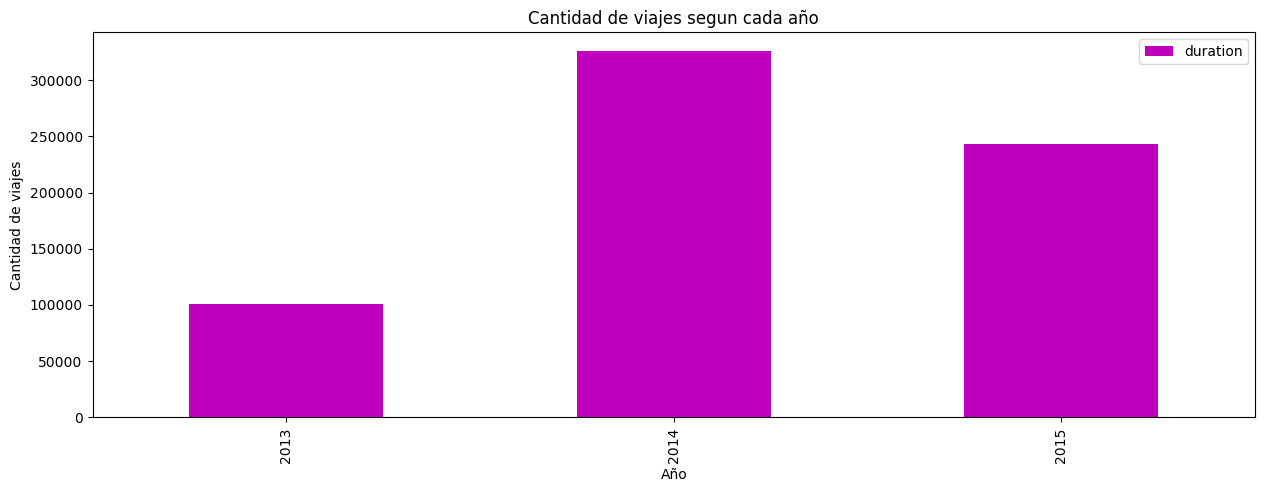

In [218]:
duracion= trip.loc[:, ('duration', 'start_year')].groupby('start_year').agg(np.size)
duracion.plot.bar(color='m');
plt.xlabel('Año');
plt.ylabel("Cantidad de viajes");
plt.title("Cantidad de viajes segun cada año");

In [10]:
#que diferencias existen entre Subscriber y customer? 

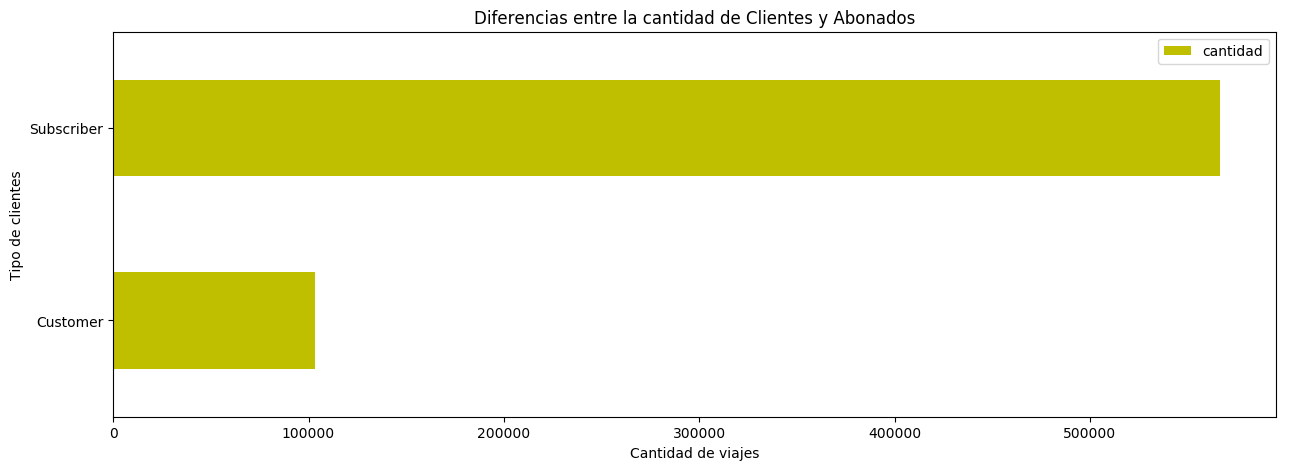

In [217]:
tipos_subs=trip.loc[:, ['subscription_type', 'cantidad']].groupby('subscription_type').agg(np.size)
tipos_subs.plot.barh(color='y');

plt.xlabel("Cantidad de viajes");
plt.ylabel("Tipo de clientes");
plt.title("Diferencias entre la cantidad de Clientes y Abonados");



Como se puede observar en este analisis, la mayoria de las personas que alquilan bicicletas son los abonados. Si bien, las personas que alquilan por día son en menor proporcion, es bueno considerarlo para tener un stock de bicicletas para las mismas.  

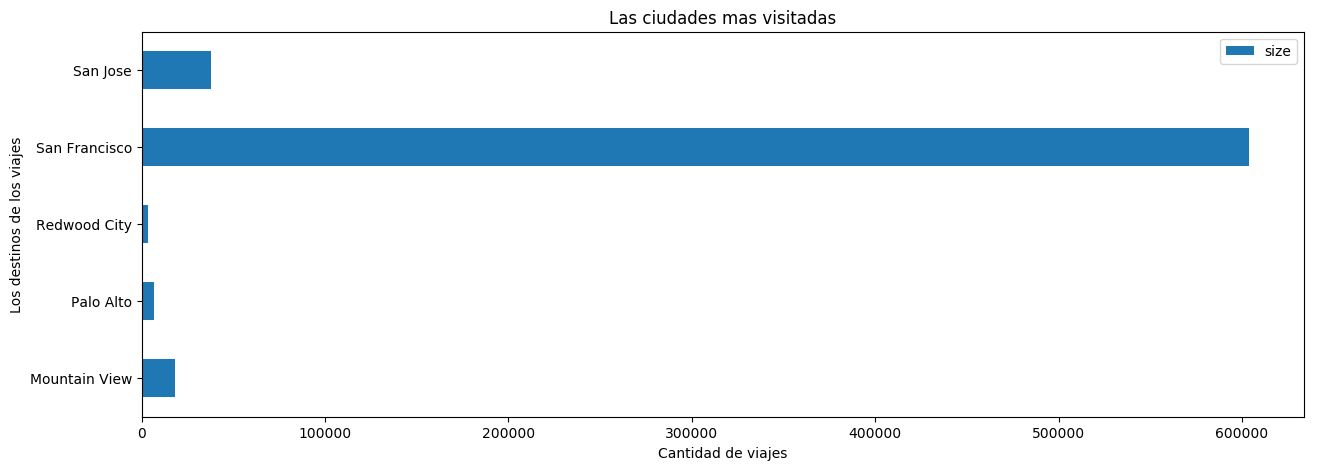

In [245]:




top=trip.merge(station, left_on='end_station_id', right_on='id', how='inner')

final=top.loc[:, ['city','size']].groupby('city').agg( np.size)
final.head()
final.plot.barh();
plt.ylabel("Los destinos de los viajes");
plt.xlabel("Cantidad de viajes");
plt.title("Las ciudades mas visitadas" );

In [ ]:
# carga de un data frame
weather = pd.read_csv('./data/weather.csv', low_memory=False)

In [ ]:
# vemos primeras filas del data frame
weather[:3]

In [ ]:
# si queremos analizar cuales son los valores de las columnas podemos obtenerlos con .columns
print "COLUMNS WEATHER.CSV:"
print ""
for name in weather.columns.values:
    print name
    # si queremos analizar cuales son los valores de las columnas podemos obtenerlos con .columns
print ""

In [ ]:
weatherSmall = weather.loc[:,("date","mean_temperature_f","mean_dew_point_f","mean_humidity","mean_sea_level_pressure_inches","mean_visibility_miles","mean_wind_speed_mph","precipitation_inches","cloud_cover","events", "wind_dir_degrees")]
weatherSmall.head()

In [ ]:
weatherSmall.describe()

In [ ]:
weatherGrouped = weatherSmall.groupby("events").mean()
weatherGrouped.head()

In [ ]:
weatherEvents = weather.loc[(weather.events > ""),("date","events")]
weatherEvents.head()

In [ ]:
#Analizamos los datos Stations
stations = pd.read_csv('./data/station.csv', low_memory=False)

In [ ]:
stations[:10]

In [ ]:
#Vemos cuantas hay por ciudad
count_citys = stations['city'].value_counts()
count_citys

In [ ]:
%matplotlib notebook
count_citys[:10].plot('bar')

In [ ]:
#Vemos cuantos hay por cantidad de "dock"
count_dock = stations['dock_count'].value_counts()
count_dock

In [ ]:
#Vemos fecha de instalacion.
# Se remarca que se instalo mas al inico que al final. Suponemos que las obras estarian "terminadas" ya
count_isntalation = stations['installation_date'].value_counts()
count_isntalation 

In [ ]:
#los demas datos y los de clima trabajan por zipCode. Por lo que "traducimos" los zipCode
tabla = {
        'zipCode': ['95113', '94063', '94041', '94107', '94301'],
        'city': ['San Jose', 'Redwood City', 'Mountain View', 'San Francisco', 'Palo Alto'],
}

tabla
df_a = pd.DataFrame(tabla, columns = ['zipCode', 'city'])
df_a

In [ ]:
Tara = pd.merge(stations, df_a, on='city', how='right')
Tara[:10]

In [ ]:
#Reducimos los datos a las Id y Los ZipCode.
tablaIdZip = Tara.loc[:,("id","zipCode")]


In [ ]:
# carga de un data frame
#flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)
status = pd.read_csv('./data/status.csv', low_memory=True, parse_dates=['time'])
status.time = status.time.dt.date
status.head()

In [ ]:
status[:10]

In [ ]:
tabla = pd.read_csv('./tablIdZip.csv', low_memory=True)
tabla['station_id'] = tabla['id']
tabla[:10]

In [ ]:
#vemos la cantidad de reportes por cantidad de vicis
NotBike = status['bikes_available'].value_counts()
NotBike[:10]

In [ ]:
#Lo mas importante es saber cuando No Hay bicis. En esos casos no estamos cumpliendo con el servicio ni con los clientes.
NotBike = status.loc[:,['station_id','bikes_available','time']].groupby('bikes_available')
NotBike = NotBike.get_group(0)
NotBike[:10]

In [ ]:
#Estaciones con mas reportes de falta de bisicleta.
NotBike1 = NotBike['station_id'].value_counts()
NotBike1[:10]

In [ ]:
#Lo emparejamos con el Codigo Zip. para poder comprarlo con el Clima
NotBikeZip = pd.merge(NotBike, tabla, on='station_id', how='right')
NotBikeZip[:10]

In [ ]:
#reducimos a lo util
NotBike = NotBikeZip.loc[:,("time","id","zipCode")]
NotBike[:10]

In [ ]:
#guradmos
NotBike.to_csv("NotBike.csv")

In [ ]:
Revisamos lo mismo con los Docks
NotDocks = status['docks_available'].value_counts()
NotDocks[:10]

In [ ]:
# Otra ves el caso intersante es que halla 0 Docks. Es implica que uno llega con la bici y no la puede guadar
# Un fallo en el servicio
NotDocks = status.loc[:,['station_id','docks_available','time']].groupby('docks_available')
NotDocks = NotDocks.get_group(0)
NotDocks[:10]

In [ ]:
#Los lugares con mallor falta de Dock. No podemos estimar cuantos faltan agregar
NotDocks1 = NotDocks['station_id'].value_counts()
NotDocks1[:10]

In [ ]:
NotDocksZip = pd.merge(NotDocks, tabla, on='station_id', how='right')
NotDocksZip[:10]

In [ ]:
NotDocks = NotBikeZip.loc[:,("time","id","zipCode")]
NotDocks[:10]

In [ ]:
#buscamos si hay una relacion entre la cantidad de Docks libre y bisicletas
grouped  = status.loc[:,['station_id','bikes_available','docks_available']].groupby('station_id')
Station = grouped.mean()
Station[:10]

In [ ]:
#Resulta que si.
#Cosa que nos lleva a pensar que no hay una relacion con la hubicacion del lugar con que halla o no bisicletas
#Por lo que se puede estimar que es algo mas relativo a la hora. 
Station.loc[:,['bikes_available','docks_available']].corr()